/tmp/ipykernel_28787/1965862131.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  NHI_integ = np.trapz(nn_exp, rr) * kpc


continue 21.48935 -6.42488
continue 21.50935 -6.42529
continue 21.52935 -6.42572
continue 21.54935 -6.42617
continue 21.56935 -6.42664
continue 21.58935 -6.42713
continue 21.60935 -6.42765
continue 21.62935 -6.42819
continue 21.64935 -6.42875
continue 21.66935 -6.42934
continue 21.68935 -6.42996
continue 21.70935 -6.43061
continue 21.72935 -6.43129
continue 21.74935 -6.43200
continue 21.76935 -6.43275
continue 21.78935 -6.43353
continue 21.80935 -6.43434
continue 21.82935 -6.43520
continue 21.84935 -6.43609
continue 21.86935 -6.43703
continue 21.88935 -6.43801
continue 21.90935 -6.43904
continue 21.92935 -6.44012
continue 21.94935 -6.44125
continue 21.96935 -6.44243
continue 21.98935 -6.44366
continue 22.00935 -6.44496
continue 22.02935 -6.44631
continue 22.04935 -6.44773
continue 22.06935 -6.44922
continue 22.08935 -6.45077
continue 22.10935 -6.45240
continue 22.12935 -6.45411
continue 22.14935 -6.45590
continue 22.16935 -6.45777
continue 22.18935 -6.45973
continue 22.20935 -6.46178
c

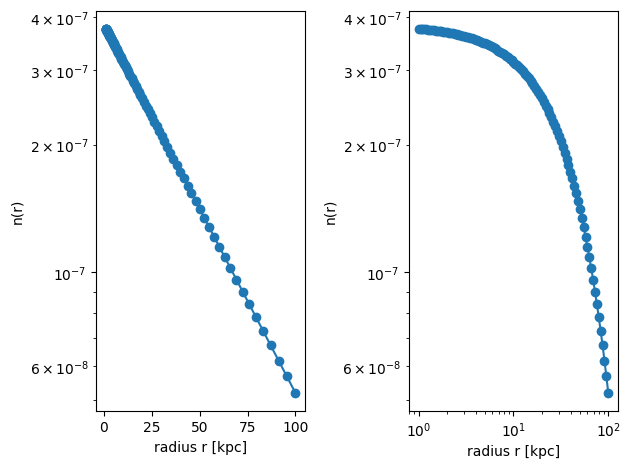

In [1]:
# Generate exponential density profile for Cloudy
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy.io import ascii
# from scipy.integrate import trapz
from numpy import log10, exp

kpc = const.kpc.cgs.value

#--------------------------------------------------
# Input parameters
r_in  = 1.0         # [kpc]
r_out = 100.        # [kpc]
r_e   = 0.5 * r_out
NHI_total = 5e16    # [cm^-2]
file_dlaw = 'dlaw_HI_exp.ini'
#--------------------------------------------------

n0 = 1.0
rr = np.logspace(log10(r_in), log10(r_out), 101)

nn_exp = n0 * exp(-rr / r_e)

# Scale to match the total H column density
# Analytic solution
n0_analytic = NHI_total / (exp(-r_in / r_e) - exp(-r_out / r_e)) / (r_e * kpc)

# Numerical integration for arbitrary functional form using trapz
NHI_integ = np.trapz(nn_exp, rr) * kpc
n0 = NHI_total / NHI_integ
nn_exp = n0 * exp(-rr / r_e)

# Plot with linear-log space
plt.subplot(1, 2, 1)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.yscale('log')

# Plot with linear-log space
plt.subplot(1, 2, 2)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
# Pad one more pixel outside the r_out to include full range 
# that is specified in "radius [r_in, r_out]"
# Purely numerical reason.
rr_pad = r_out * (rr[1] / rr[0])
nn_pad = n0 * exp(-rr_pad / r_e)

# Output
for ii in range(len(rr)):
    print("continue {:8.5f} {:8.5f}".format(log10(rr[ii] * kpc), log10(nn_exp[ii])))

with open(file_dlaw, 'w') as fp:
    print("dlaw table", file=fp)
    for r_i, n_i in zip(rr, nn_exp):
        print("continue {:8.5f} {:8.5f}".format(log10(r_i * kpc), log10(n_i)), file=fp)
    print("continue {:8.5f} {:8.5f}".format(log10(rr_pad * kpc), log10(nn_pad)), file=fp)
    print("end of dlaw", file=fp)


/tmp/ipykernel_19398/3930507535.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  CIV_integ = np.trapz(nn_exp, rr) * kpc


continue 21.48935 -6.52179
continue 21.50935 -6.52220
continue 21.52935 -6.52263
continue 21.54935 -6.52308
continue 21.56935 -6.52355
continue 21.58935 -6.52404
continue 21.60935 -6.52456
continue 21.62935 -6.52510
continue 21.64935 -6.52566
continue 21.66935 -6.52625
continue 21.68935 -6.52687
continue 21.70935 -6.52752
continue 21.72935 -6.52820
continue 21.74935 -6.52891
continue 21.76935 -6.52966
continue 21.78935 -6.53044
continue 21.80935 -6.53125
continue 21.82935 -6.53211
continue 21.84935 -6.53300
continue 21.86935 -6.53394
continue 21.88935 -6.53492
continue 21.90935 -6.53595
continue 21.92935 -6.53703
continue 21.94935 -6.53816
continue 21.96935 -6.53934
continue 21.98935 -6.54057
continue 22.00935 -6.54187
continue 22.02935 -6.54322
continue 22.04935 -6.54464
continue 22.06935 -6.54613
continue 22.08935 -6.54768
continue 22.10935 -6.54931
continue 22.12935 -6.55102
continue 22.14935 -6.55281
continue 22.16935 -6.55468
continue 22.18935 -6.55664
continue 22.20935 -6.55869
c

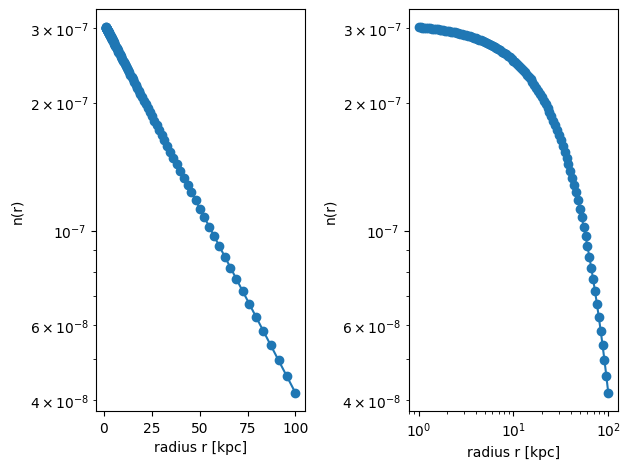

In [5]:
# Generate exponential density profile for Cloudy
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy.io import ascii
# from scipy.integrate import trapz
from numpy import log10, exp

kpc = const.kpc.cgs.value

#--------------------------------------------------
# Input parameters
r_in  = 1.0         # [kpc]
r_out = 100.        # [kpc]
r_e   = 0.5 * r_out
CIV_total = 4e16    # [cm^-2]
file_dlaw = 'dlaw_CIV_exp.ini'
#--------------------------------------------------

n0 = 1.0
rr = np.logspace(log10(r_in), log10(r_out), 101)

nn_exp = n0 * exp(-rr / r_e)

# Scale to match the total H column density
# Analytic solution
n0_analytic = CIV_total / (exp(-r_in / r_e) - exp(-r_out / r_e)) / (r_e * kpc)

# Numerical integration for arbitrary functional form using trapz
CIV_integ = np.trapz(nn_exp, rr) * kpc
n0 = CIV_total / CIV_integ
nn_exp = n0 * exp(-rr / r_e)



# Plot with linear-log space
plt.subplot(1, 2, 1)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.yscale('log')

# Plot with linear-log space
plt.subplot(1, 2, 2)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
# Pad one more pixel outside the r_out to include full range 
# that is specified in "radius [r_in, r_out]"
# Purely numerical reason.
rr_pad = r_out * (rr[1] / rr[0])
nn_pad = n0 * exp(-rr_pad / r_e)

# Output
for ii in range(len(rr)):
    print("continue {:8.5f} {:8.5f}".format(log10(rr[ii] * kpc), log10(nn_exp[ii])))

with open(file_dlaw, 'w') as fp:
    print("dlaw table", file=fp)
    for r_i, n_i in zip(rr, nn_exp):
        print("continue {:8.5f} {:8.5f}".format(log10(r_i * kpc), log10(n_i)), file=fp)
    print("continue {:8.5f} {:8.5f}".format(log10(rr_pad * kpc), log10(nn_pad)), file=fp)
    print("end of dlaw", file=fp)


# C IV Density

/tmp/ipykernel_19398/3028245407.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  CIV_integ = np.trapz(nn_exp, rr) * kpc
/tmp/ipykernel_19398/3028245407.py:56: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Column_CIV = np.trapz(nn_exp,rr_CIV)*kpc


Column Density (CIV) = 9.59 × 10^15 cm^-2


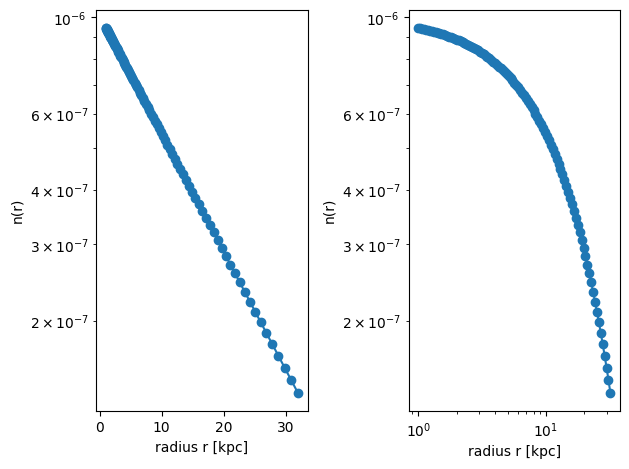

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy.io import ascii
# from scipy.integrate import trapz
from numpy import log10, exp

kpc = const.kpc.cgs.value

#--------------------------------------------------
# Input parameters
r_in  = 1.0         # [kpc]
r_out = 32.        # [kpc]
r_e   = 0.5 * r_out
CIV_total = 4e16    # [cm^-2]
file_dlaw = 'dlaw_CIV_exp.ini'
#--------------------------------------------------

n0 = 1.0
rr = np.logspace(log10(r_in), log10(r_out), 101)

nn_exp = n0 * exp(-rr / r_e)

# Scale to match the total H column density
# Analytic solution
n0_analytic = CIV_total / (exp(-r_in / r_e) - exp(-r_out / r_e)) / (r_e * kpc)

# Numerical integration for arbitrary functional form using trapz
CIV_integ = np.trapz(nn_exp, rr) * kpc
n0 = CIV_total / CIV_integ
nn_exp = n0 * exp(-rr / r_e)

# Plot with linear-log space
plt.subplot(1, 2, 1)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.yscale('log')

# Plot with linear-log space
plt.subplot(1, 2, 2)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()


r_in  = 15.0         # [kpc]
r_out = 20.        # [kpc]
rr_CIV = np.logspace(log10(r_in), log10(r_out), 101)

Column_CIV = np.trapz(nn_exp,rr_CIV)*kpc

exponent = int(log10(Column_CIV))
coefficient = Column_CIV / (10**exponent)

# Print in the desired format
print(f"Column Density (CIV) = {coefficient:.2f} × 10^{exponent} cm^-2")
